In [ ]:
#pip install pandas numpy matplotlib scikit-learn

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Reading data from a CSV file
df = pd.read_csv('SampleData.csv')

In [3]:
# Adjust the feature names based on your dataset
X = df[['feature1', 'feature2']]

In [4]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn

In [5]:
# Initialize KMeans with the desired number of clusters (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=0)
# Fit the model to the scaled data
kmeans.fit(X_scaled)
labels = kmeans.labels_
# Add cluster labels back to the original dataframe for visualization
df['cluster'] = labels

/Users/autumnstar/opt/anaconda3/envs/Python_Tutorials/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Feature 2')

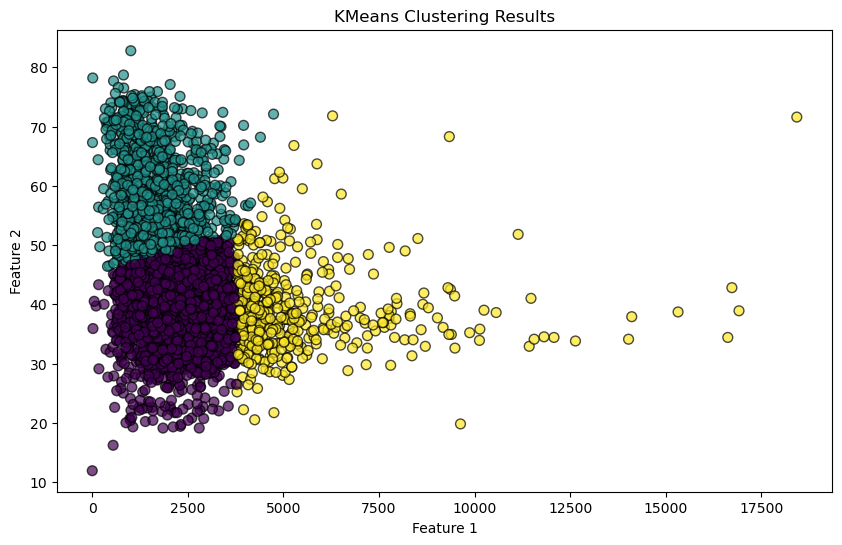

In [6]:
plt.figure(figsize=(10, 6))
# Scatter plot of the data points, colored by cluster labels
plt.scatter(df['feature1'], df['feature2'], c=df['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)
plt.title('KMeans Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

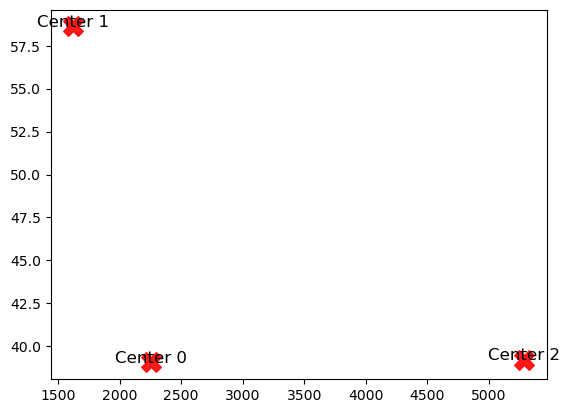

In [7]:
# Mark the cluster centers on the plot
# Inverse transform the standardized coordinates of cluster centers back to the original scale
centers = scaler.inverse_transform(kmeans.cluster_centers_)
# Scatter plot for cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9, marker='X')
# Annotate the cluster centers
for i, c in enumerate(centers):
    plt.text(c[0], c[1], f'Center {i}', fontsize=12, horizontalalignment='center')

plt.show()